In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [99]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample

In [100]:
df = pd.read_csv('conversion_data.csv')
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [101]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


# Data preprocessing I

<AxesSubplot:>

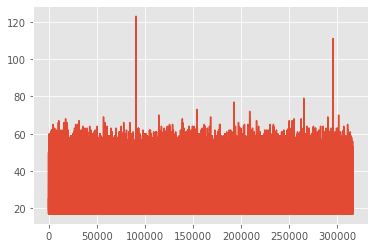

In [102]:
df['age'].plot()

In [103]:
print((df["age"].sort_values(ascending=False)))

90928     123
295581    111
265167     79
192644     77
154217     73
         ... 
267312     17
116907     17
19652      17
116914     17
223133     17
Name: age, Length: 316200, dtype: int64


In [104]:
# we can see most of ages are under 80, then try to remove them
#cleaning
df = df.drop(df["age"][df["age"] > 80].index)
df.describe()

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


# Visualization

1. Exploration of different countries

Text(0.5, 1.0, 'Converted Total')

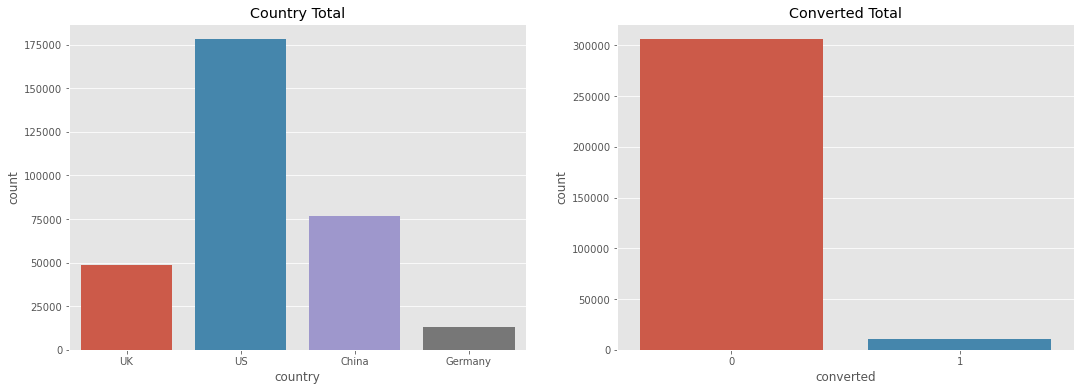

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(18, 6))
sns.countplot(data=df, x='country',ax=ax[0])
sns.countplot(data=df, x='converted',ax=ax[1])
ax[0].set_title('Country Total')
ax[1].set_title('Converted Total')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


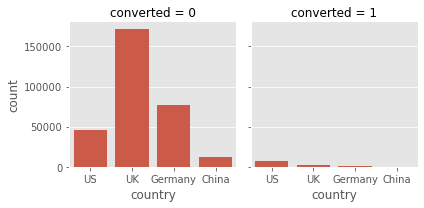

In [106]:
g = sns.FacetGrid(df, col = 'converted')
g.map(sns.countplot, 'country')

In [115]:
country_df = df[["country", "converted"]].groupby("country").mean().reset_index()
country_df

,country,converted
0,China,0.001332
1,Germany,0.062428
2,UK,0.052612
3,US,0.037801


<AxesSubplot:xlabel='country', ylabel='converted'>

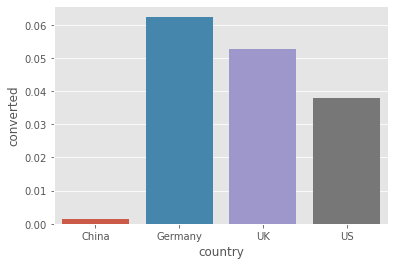

In [117]:
#showing by bar chart
sns.barplot(x='country',y='converted',data=country_df)

2.Exploration of different kinds of users

Text(0.5, 1.0, 'Mean Conversion Rate per User Type')

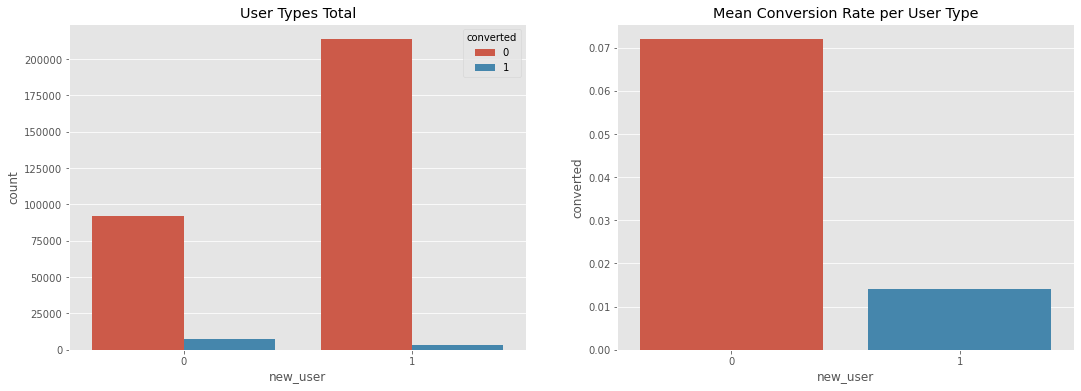

In [124]:
user_df = df[['new_user', 'converted']].groupby('new_user').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='new_user', hue='converted', data=df, ax=ax[0])
sns.barplot(x='new_user', y='converted', data=user_df, ax=ax[1])

ax[0].set_title('User Types Total')
ax[1].set_title('Mean Conversion Rate per User Type')


# data preporcessing part II
Handling some categorical features

In [43]:
X = df.loc[:, ("country", "age", "new_user", "source", "total_pages_visited")]
X = pd.get_dummies(X)
X.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,1,0,1,0,0
1,23,1,5,0,0,0,1,0,0,1
2,28,1,4,0,0,0,1,0,0,1
3,39,1,5,1,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,0,1


In [44]:
y = df["converted"]
y.mean()

0.03225194340255157

In [45]:
# which means data is imbalanced
# it is better to use metrics 'accuracy'
# with roc analysis

In [46]:
# Split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
y_train.mean(), y_test.mean()

(0.03246134093612522, 0.03182680696912196)

In [ ]:
# the mean value of two sets are on balance
# there is no much bias

# Random Forest Model

In [57]:
rf_model = RandomForestClassifier(n_estimators=100, oob_score=True, max_features=3, class_weight="balanced")
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
rf_model.score(X_train, y_train)

0.9886052527235994

In [48]:
rf_model.score(X_test, y_test)

0.9591359515458188

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score

In [69]:
pred = rf_model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    101025
           1       0.81      0.67      0.73      3321

    accuracy                           0.98    104346
   macro avg       0.90      0.83      0.86    104346
weighted avg       0.98      0.98      0.98    104346



In [70]:
print(confusion_matrix(y_test,pred))

[[100497    528]
 [  1093   2228]]
